In [1]:
import healpy as hp
import pandas as pd
import numpy as np
import math
from skimage.feature import peak_local_max

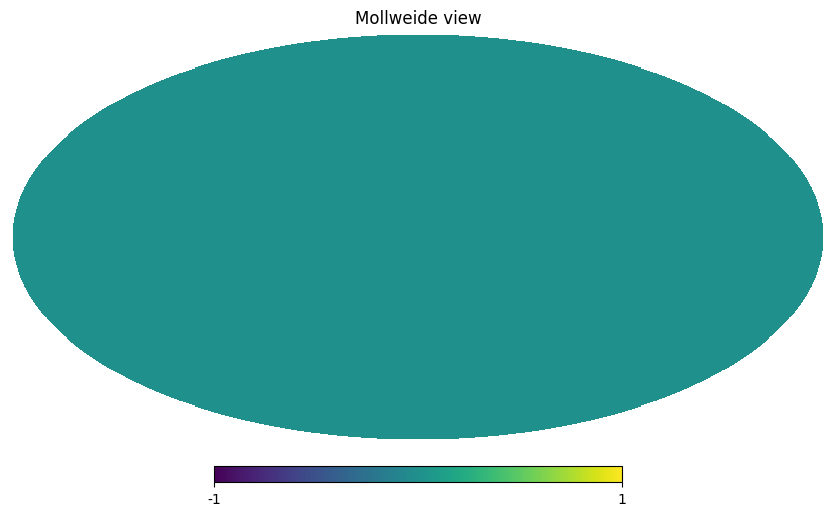

In [2]:
nside = 1024
map_test = np.zeros(hp.nside2npix(nside))

# First PS
lon_PS_1 = 0
lat_PS_1 = 45
pix_1 = hp.ang2pix(nside, lon_PS_1, lat_PS_1, lonlat = True)
map_test[pix_1] = 1

# Second PS
lon_PS_2 = 30
lat_PS_2 = -45
pix_2 = hp.ang2pix(nside, lon_PS_2, lat_PS_2, lonlat = True)
map_test[pix_2] = 1

hp.mollview(map_test)


In [25]:
%store -r lon
%store -r lat
%store -r xsize

In [4]:
reso_test = hp.nside2resol(nside, arcmin=True)

In [5]:
patches_test_map = [hp.gnomview(map_test, rot=[lon[i], lat[i]], xsize = xsize, reso = reso_test, return_projected_map = True, no_plot = True) for i in range(len(lon))]

In [6]:
patches_test_map = np.array(patches_test_map)

In [69]:
def get_peaks_lonlat(patches, lon = lon, lat = lat, xsize = xsize, reso = reso_test , peak_distance_tol=2, threshold_abs=0.99):
    peak_coords = []

    for patch, patch_lon, patch_lat in zip(patches, lon, lat):
        peak_indices = peak_local_max(patch, min_distance=peak_distance_tol, threshold_abs=threshold_abs, exclude_border=False)
    
        proj = hp.projector.GnomonicProj(ysize=xsize, xsize=xsize, rot=(patch_lon, patch_lat, 0), reso=reso)

        x, y = proj.ij2xy(peak_indices[:, 0], peak_indices[:, 1])
        lon_coords, lat_coords = proj.xy2ang(x=x, y=y, lonlat=True)

        if np.isscalar(lon_coords):  
            lon_coords = [lon_coords] 

        if np.isscalar(lat_coords):  
            lat_coords = [lat_coords]  

        for i in range(len(lon_coords)):
            peak_coords.append((lon_coords[i], lat_coords[i]))

    return peak_coords


In [70]:
peaks_lonlat = get_peaks_lonlat(patches_test_map)

In [71]:
peaks_lonlat

[(0.0668282224504722, 44.977309656049265),
 (0.01654563108248235, 45.032740363571016),
 (29.95350266087176, -45.04252989332258)]

In [12]:
import astropy.coordinates as coord 

In [65]:
np.degrees(coord.angular_separation(np.radians(29.95350266087176), np.radians(-45.04252989332258), np.radians(30), np.radians(-45)))

0.05374932983764464

In [68]:
0.05374932983764464*60/reso_test

0.9387199958542822

In [ ]:
# 0.94 pix de error